In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [2]:
df = pd.read_csv('student_performance_clean.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score,performance_band,pass_math,pass_reading,pass_writing,passed_all,grade_band
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,Medium,1,1,1,1,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,High,1,1,1,1,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,High,1,1,1,1,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,Low,1,1,1,1,F
4,male,group C,some college,standard,none,76,78,75,229,76.333333,Medium,1,1,1,1,B


In [9]:
plt.style.use("ggplot")
sns.set_palette("viridis")

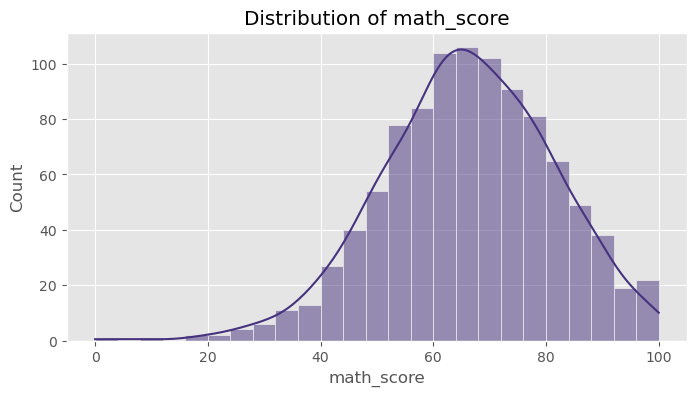

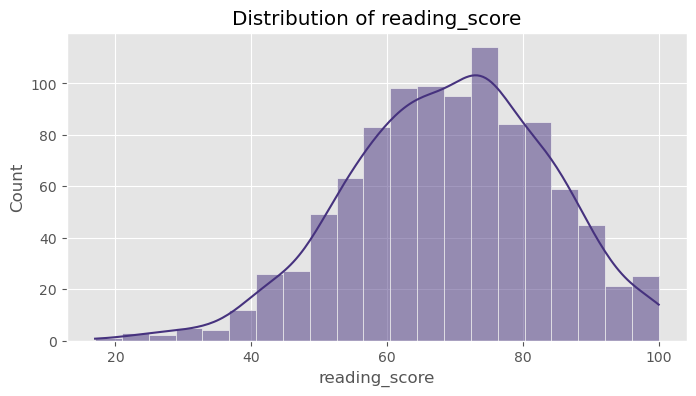

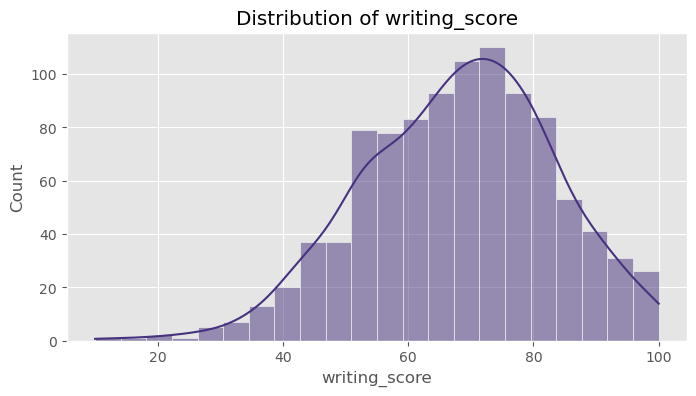

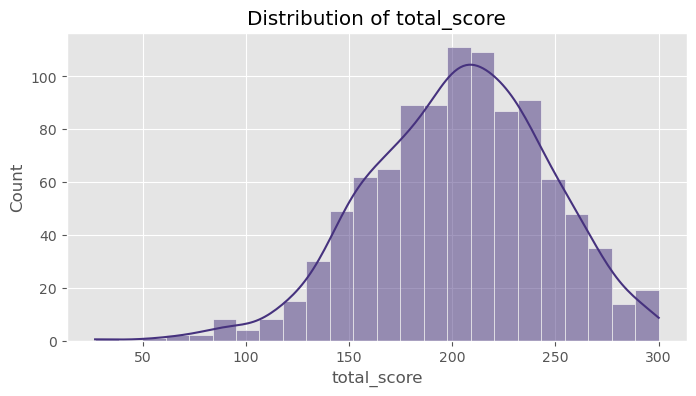

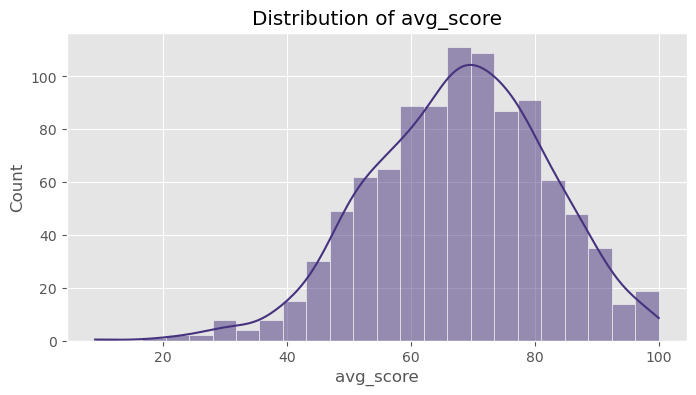

In [10]:
# Distribution of numerical scores
num_cols = ['math_score', 'reading_score', 'writing_score', 'total_score', 'avg_score']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

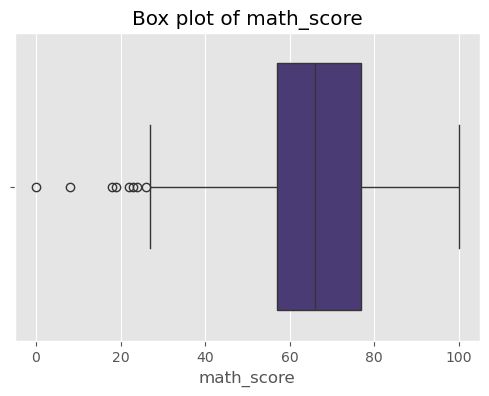

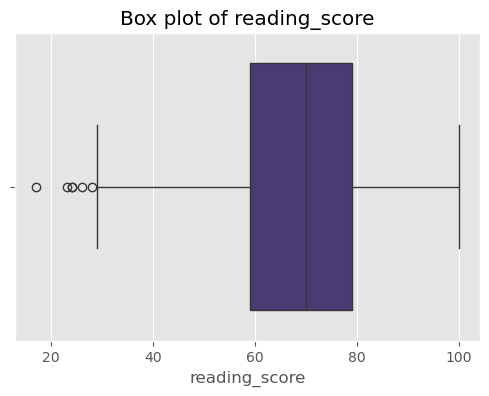

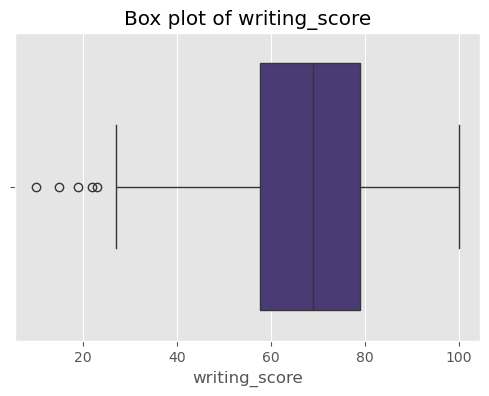

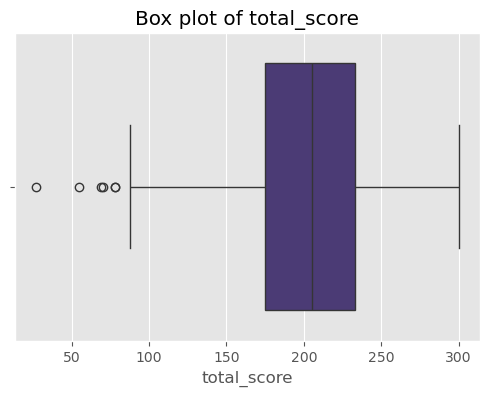

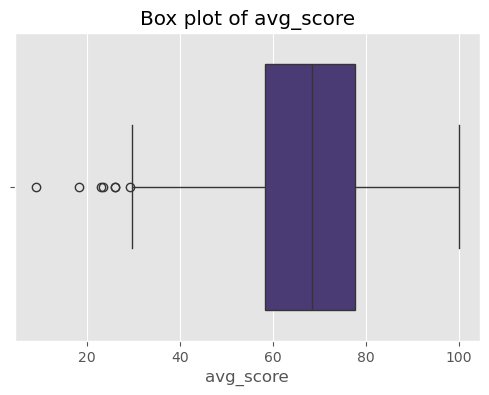

In [11]:
# Boxplot for outlier Distribution
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of {col}")
    plt.show()

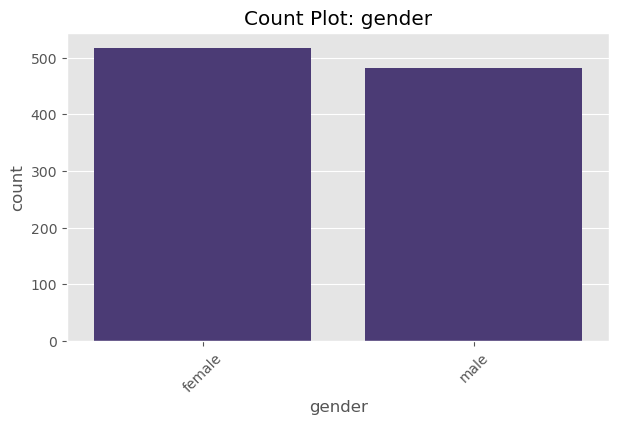

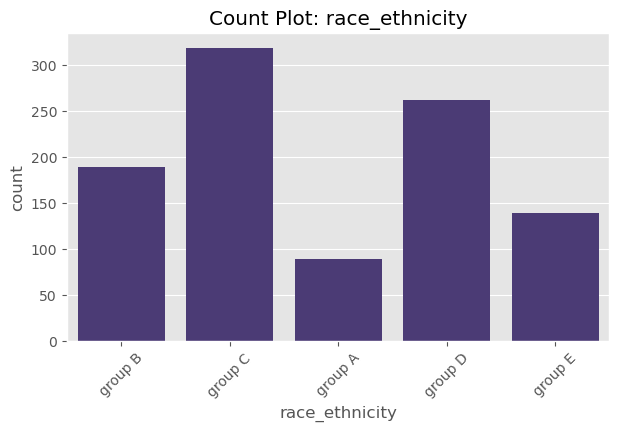

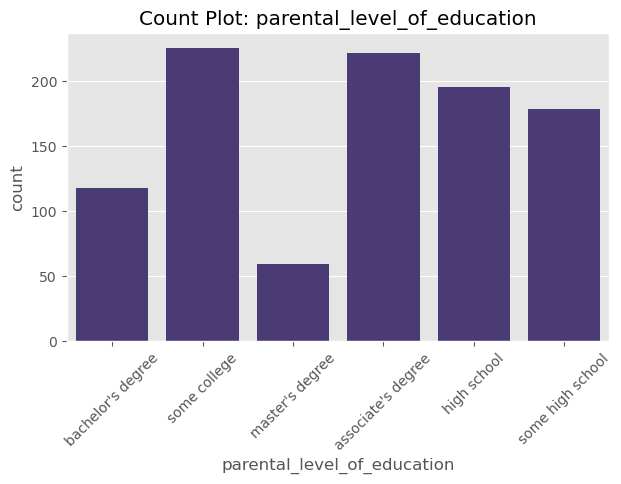

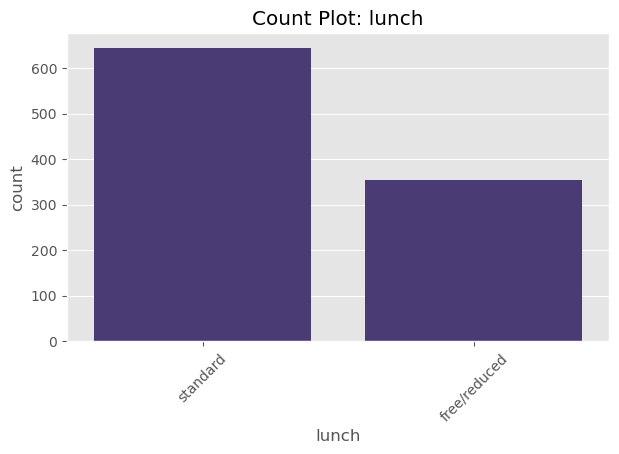

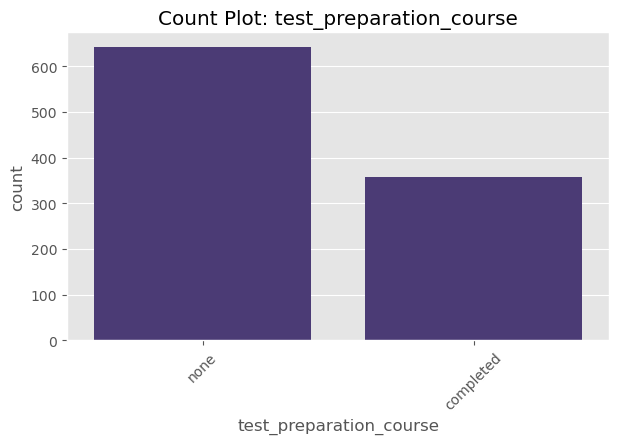

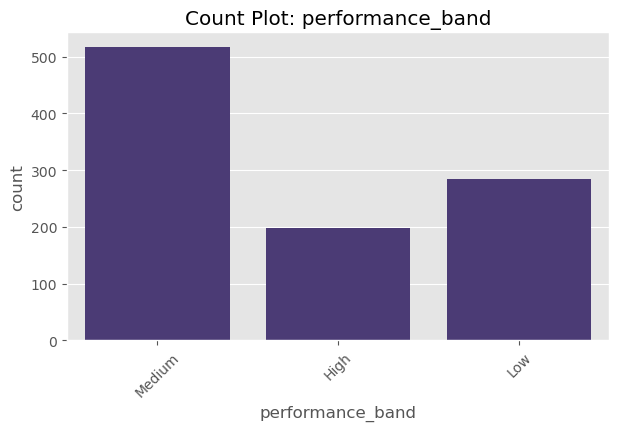

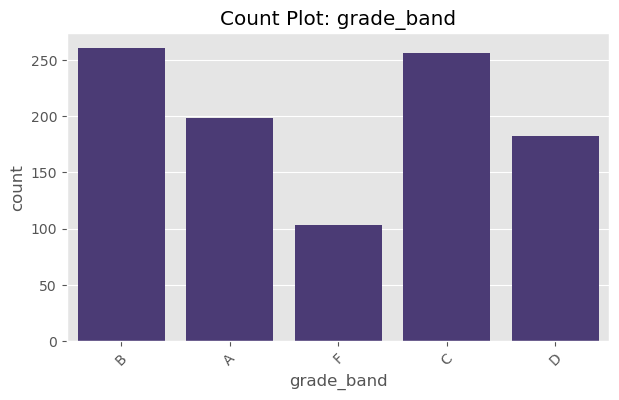

In [12]:
# Categorical Distribution
cat_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'performance_band', 'grade_band']

for col in cat_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f"Count Plot: {col}")
    plt.show()

## Exploratory Data Analysis

### 1. Average Score by Gender

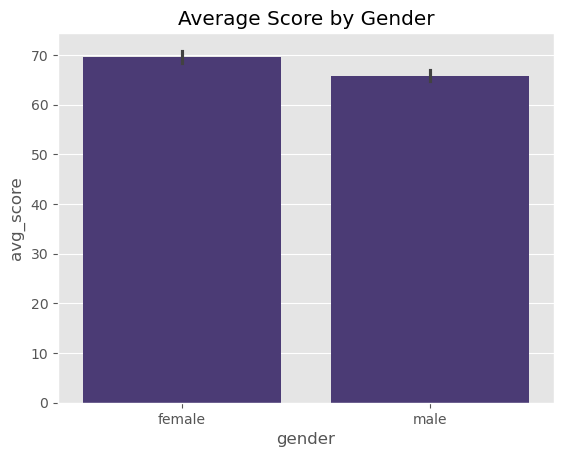

In [19]:
plt.figure()
sns.barplot(data=df, x="gender", y="avg_score")
plt.title("Average Score by Gender")
plt.show()

### 2. Average Score by Parental Education

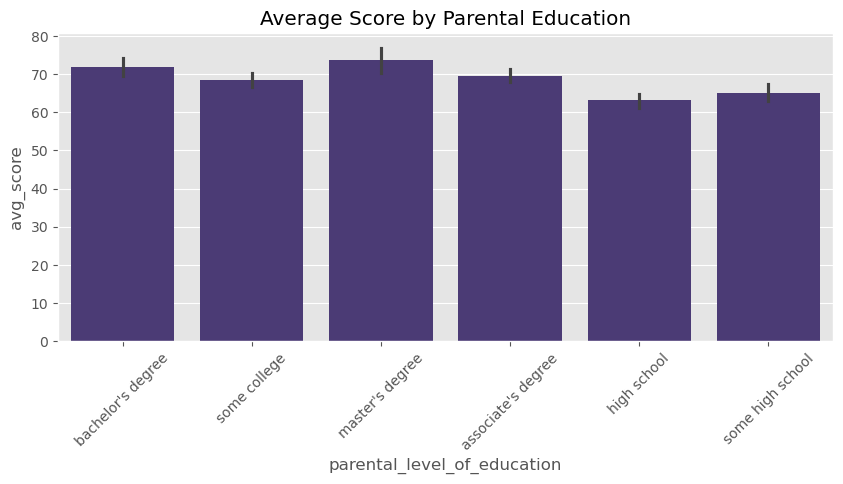

In [14]:
plt.figure(figsize=(10, 4))
sns.barplot(data=df, x="parental_level_of_education", y="avg_score")
plt.xticks(rotation=45)
plt.title("Average Score by Parental Education")
plt.show()

### 3. Test Preparation Impact

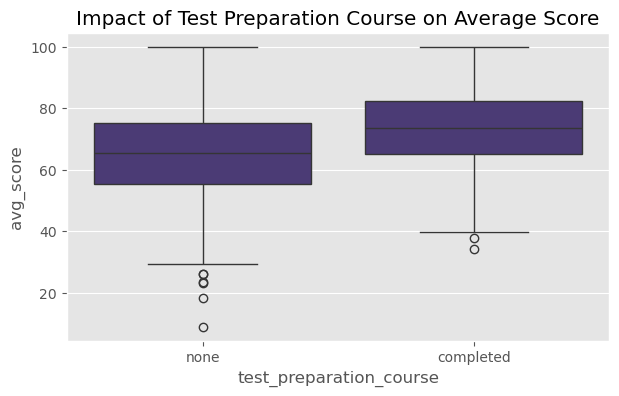

In [16]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x="test_preparation_course", y="avg_score")
plt.title("Impact of Test Preparation Course on Average Score")
plt.show()

  test_preparation_course  math_score  reading_score  writing_score  avg_score
0               completed   69.695531      73.893855      74.418994  72.669460
1                    none   64.077882      66.534268      64.504673  65.038941


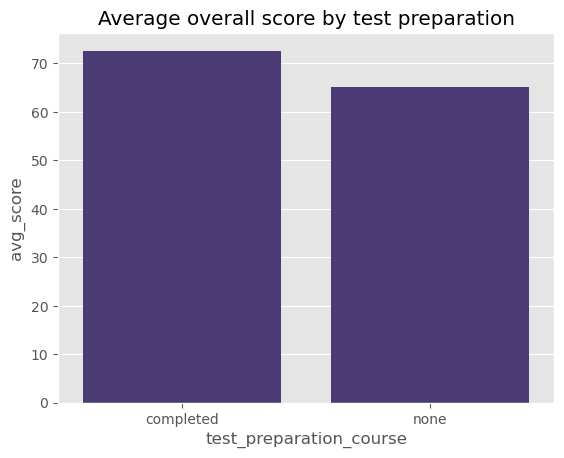

In [24]:
prep_scores = df.groupby('test_preparation_course')[['math_score','reading_score','writing_score','avg_score']].mean().reset_index()
print(prep_scores)

sns.barplot(data=prep_scores, x='test_preparation_course', y='avg_score')
plt.title("Average overall score by test preparation")
plt.show()

### 4. Lunch Type vs Avg Score

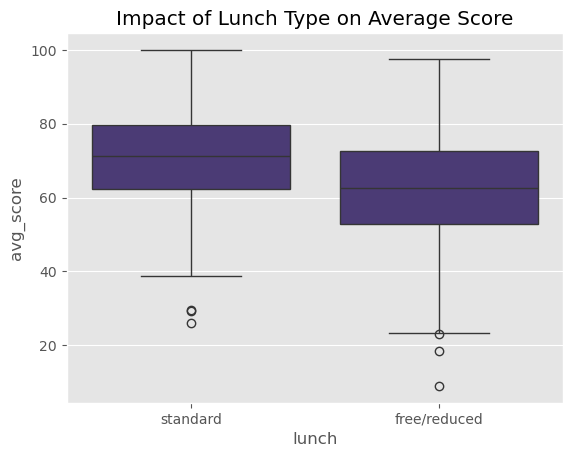

In [17]:
plt.figure()
sns.boxplot(data=df, x="lunch", y="avg_score")
plt.title("Impact of Lunch Type on Average Score")
plt.show()

### 5. Correlation Analysis

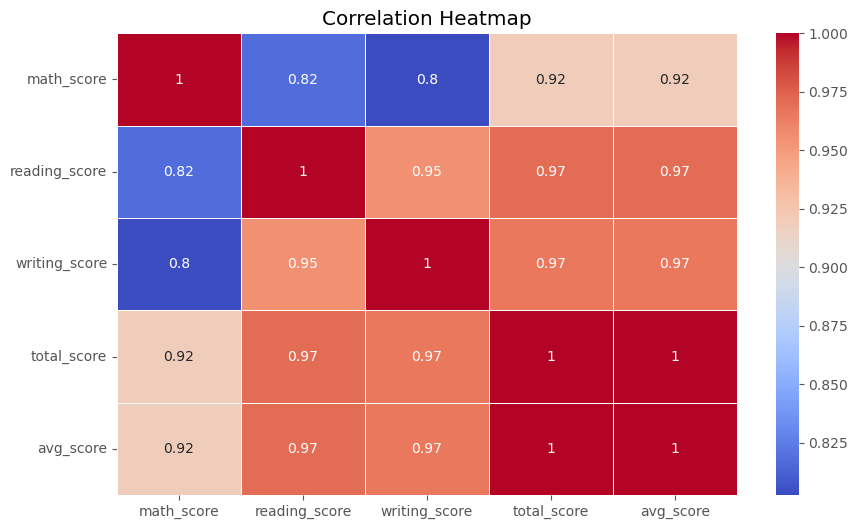

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

### 6. Performance Band Analysis

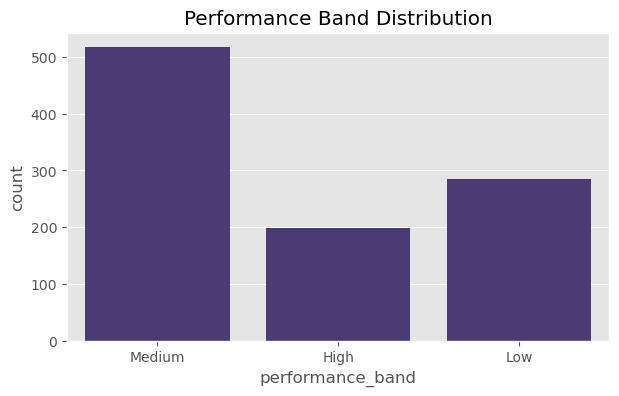

In [28]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="performance_band")
plt.title("Performance Band Distribution")
plt.show()

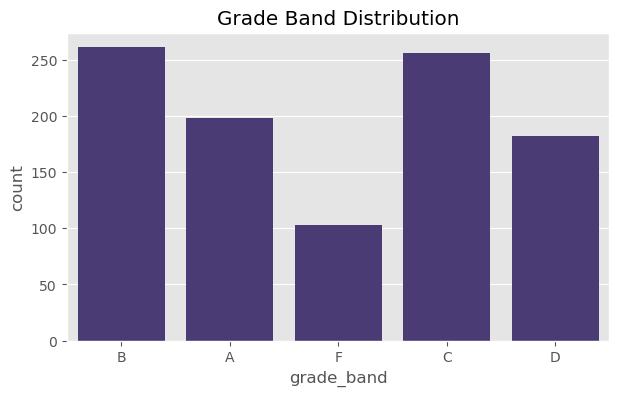

In [29]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="grade_band")
plt.title("Grade Band Distribution")
plt.show()

## Pass Rate Analysis

In [31]:
pass_cols = ['pass_math', 'pass_reading', 'pass_writing', 'passed_all']

print("\n📌 Pass Rate Summary:\n")
for col in pass_cols:
    rate = df[col].mean() * 100
    print(f"{col}: {rate:.2f}%")


📌 Pass Rate Summary:

pass_math: 96.00%
pass_reading: 97.40%
pass_writing: 96.80%
passed_all: 94.90%


### Pass rate by Gender

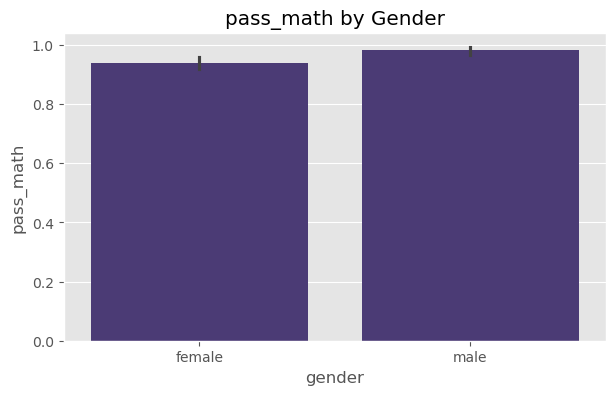

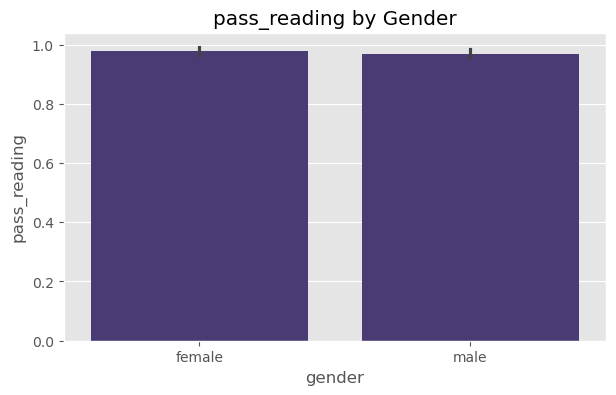

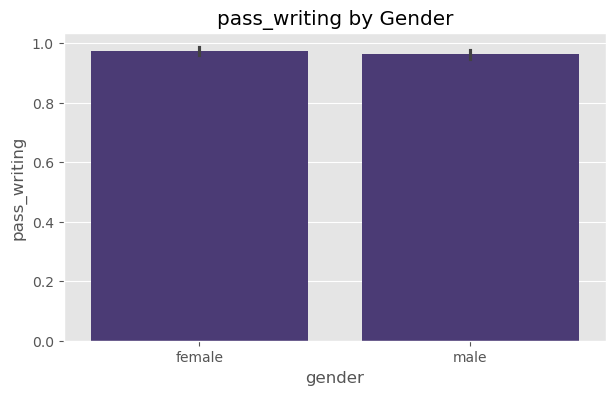

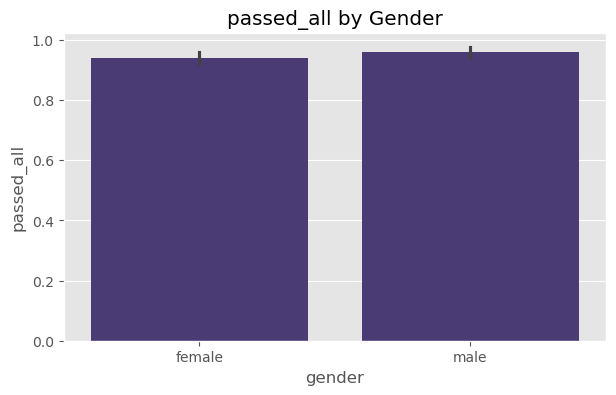

In [32]:
for col in pass_cols:
    plt.figure(figsize=(7, 4))
    sns.barplot(data=df, x='gender', y=col)
    plt.title(f'{col} by Gender')
    plt.show()

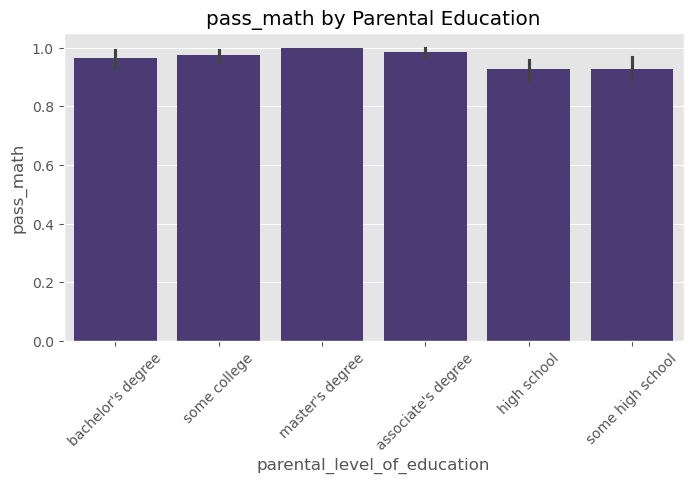

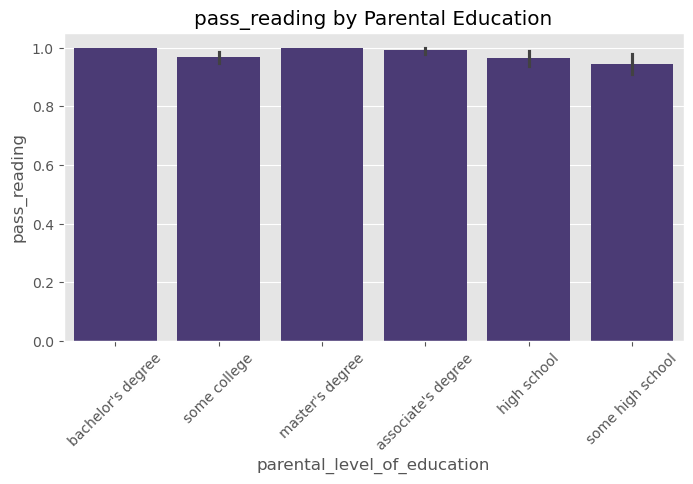

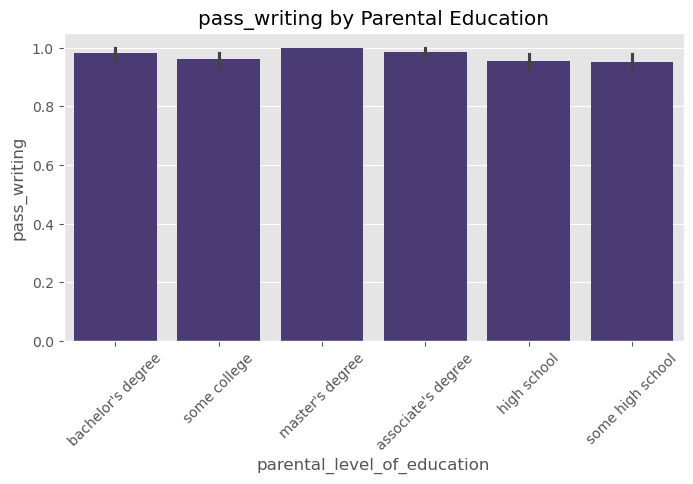

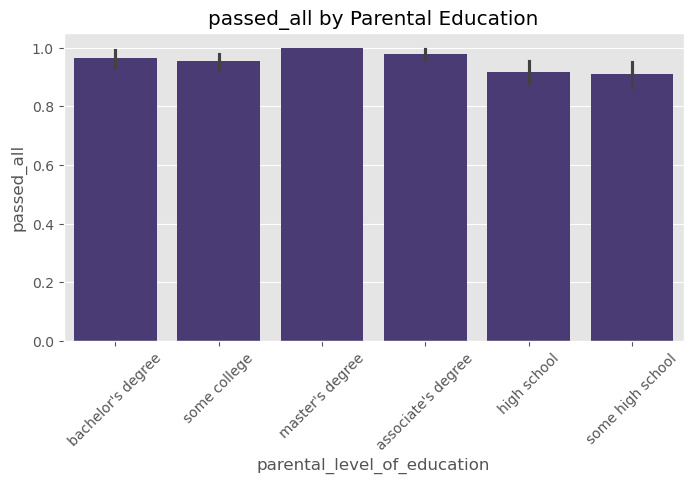

In [33]:
for col in pass_cols:
    plt.figure(figsize=(8,4))
    sns.barplot(data=df, x="parental_level_of_education", y=col)
    plt.xticks(rotation=45)
    plt.title(f"{col} by Parental Education")
    plt.show()

### High Vs Low Performers

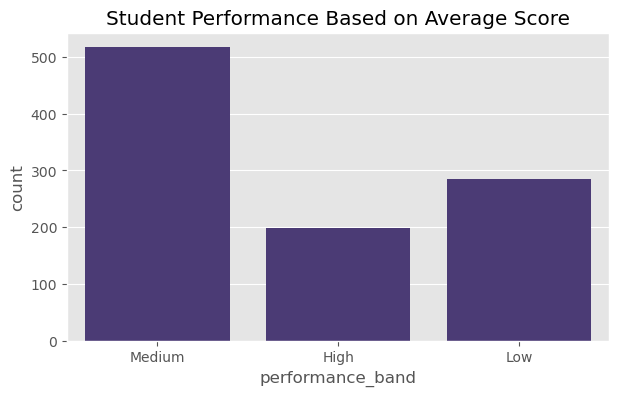

In [36]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x="performance_band")
plt.title("Student Performance Based on Average Score")
plt.show()

In [38]:
grouped = df.groupby("performance_band")[['math_score','reading_score','writing_score','avg_score']].mean()
print("\n📌 Performance Group Statistics:\n", grouped)


📌 Performance Group Statistics:
                   math_score  reading_score  writing_score  avg_score
performance_band                                                     
High               85.136364      88.383838      87.671717  87.063973
Low                49.249123      51.845614      49.891228  50.328655
Medium             68.077369      71.359768      70.553191  69.996776


## Data Connection

In [39]:
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="students_db"
)

print("Connection Successfull!")

cursor = conn.cursor()

Connection Successfull!


In [40]:
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://root:@localhost/students_db')

# load data into MYSQL
df.to_sql('student_performance', con=engine, if_exists='replace', index=False)

print('Data Successfully imported into MYSQL')

Data Successfully imported into MYSQL
